# Principal Component Analysis (PCA) – Quick Overview

PCA is a dimensionality-reduction method that transforms a high-dimensional dataset into a smaller set of uncorrelated “principal components,” ordered by the amount of variance they capture.  

1. **Standardize** features to zero mean and unit variance.  
2. **Compute** the covariance matrix of the data.  
3. **Eigen-decompose** it to obtain eigenvectors (directions) and eigenvalues (variances).  
4. **Select** the top \(k\) eigenvectors whose eigenvalues sum to the desired explained variance (e.g., 90%).  
5. **Project** the original data onto these \(k\) vectors to get a \(k\)-dimensional representation.

Use PCA to visualize data, remove noise, extract features, or mitigate multicollinearity—while retaining most of the dataset’s variability.  


#### implementation (files not included in github repo due to size constraints)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("filtered.tsv", sep="\t")
df1 = pd.read_csv("class.tsv", sep="\t", header=None)
df2 = pd.read_csv("columns.tsv", sep="\t", comment="#")

# Extract Gene IDs
x1 = " " + str(df2.loc[df2['GeneSymbol'] == 'GATA3', 'ID'].values[0])
y1 = " " + str(df2.loc[df2['GeneSymbol'] == 'XBP1', 'ID'].values[0])

# Expression values and class labels
X = df[x1].values
Y = df[y1].values
Z = df1[0].values

# Class masks
mask0 = Z == 0
mask1 = Z == 1


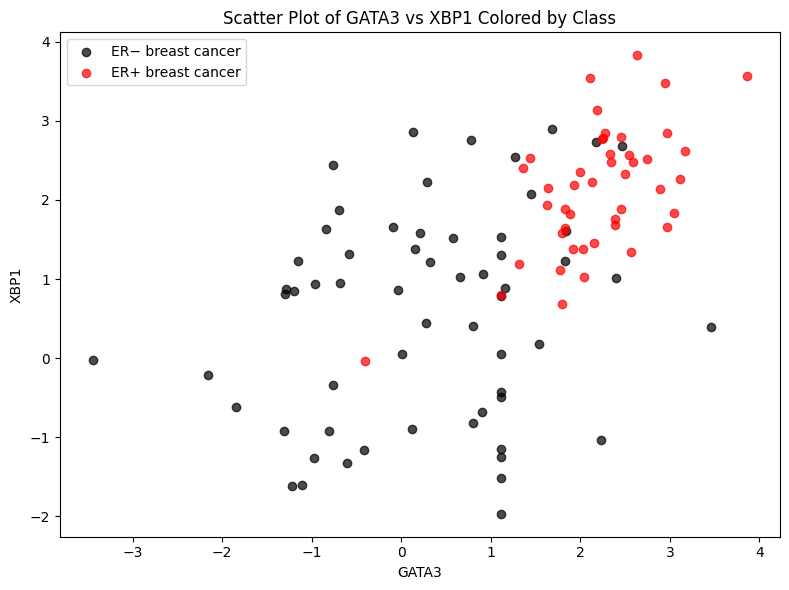

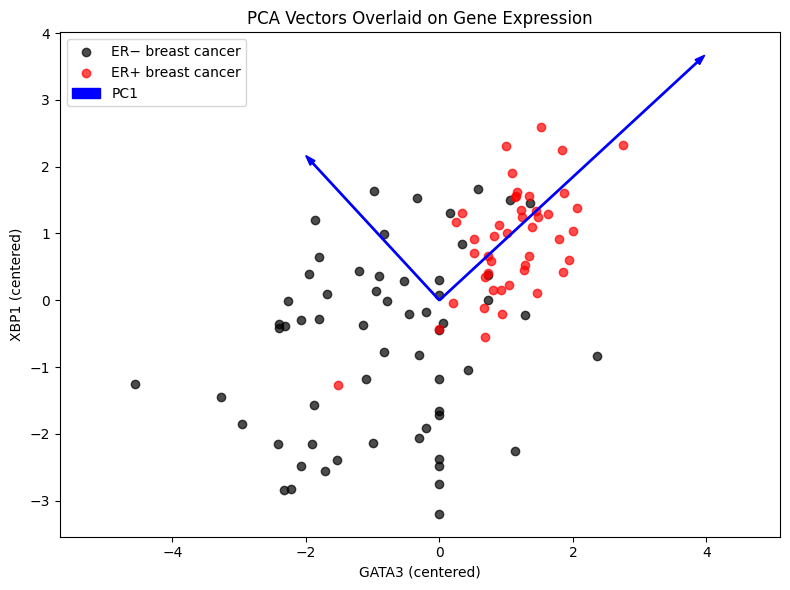

In [28]:
# Scatter plot of original expression data
plt.figure(figsize=(8, 6))
plt.scatter(X[mask0], Y[mask0], color='black', alpha=0.7, label='ER− breast cancer')
plt.scatter(X[mask1], Y[mask1], color='red', alpha=0.7, label='ER+ breast cancer')
plt.xlabel("GATA3")
plt.ylabel("XBP1")
plt.title("Scatter Plot of GATA3 vs XBP1 Colored by Class")
plt.legend()
plt.tight_layout()
plt.show()

# Manual PCA
data = np.vstack((X, Y)).T
mean = data.mean(axis=0)
data_centered = data - mean
cov_matrix = np.cov(data_centered.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalue descending
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]
components = eig_vecs.T
explained = eig_vals

# PCA vector plot
plt.figure(figsize=(8, 6))
plt.scatter(data_centered[mask0, 0], data_centered[mask0, 1], color='black', alpha=0.7, label='ER− breast cancer')
plt.scatter(data_centered[mask1, 0], data_centered[mask1, 1], color='red', alpha=0.7, label='ER+ breast cancer')

for i in range(2):
    vec = components[i] * np.sqrt(explained[i]) * 3
    plt.arrow(0, 0, vec[0], vec[1], color='blue', width=0.02, head_width=0.1, label='PC1' if i == 0 else None)

plt.xlabel("GATA3 (centered)")
plt.ylabel("XBP1 (centered)")
plt.title("PCA Vectors Overlaid on Gene Expression")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


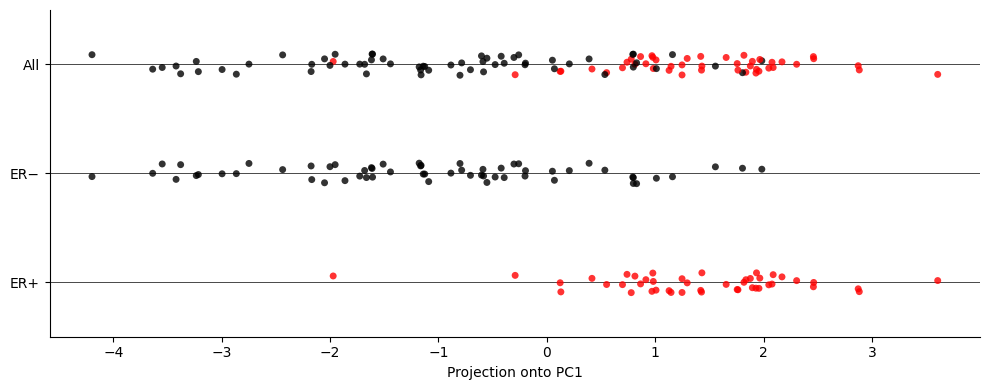

In [29]:
pc1_vector = eig_vecs[:, 0]
pc1_projection = data_centered @ pc1_vector

# Grouped data for plotting
df_all = pd.DataFrame({
    "PC1": pc1_projection,
    "Group": "All",
    "Color": np.where(Z == 0, "black", "red")
})

df_er_minus = pd.DataFrame({
    "PC1": pc1_projection[mask0],
    "Group": "ER−",
    "Color": "black"
})

df_er_plus = pd.DataFrame({
    "PC1": pc1_projection[mask1],
    "Group": "ER+",
    "Color": "red"
})

plot_df = pd.concat([df_all, df_er_minus, df_er_plus], ignore_index=True)

# Strip plot
plt.figure(figsize=(10, 4))
ax = sns.stripplot(
    data=plot_df, x="PC1", y="Group", hue="Color",
    palette={"black": "black", "red": "red"},
    dodge=False, jitter=True, alpha=0.8, size=5
)

ax.yaxis.grid(True, linestyle='-', color='black', linewidth=0.5)
plt.xlabel("Projection onto PC1")
plt.ylabel("")
plt.legend([], [], frameon=False)  # Hide legend
sns.despine()
plt.tight_layout()
plt.show()
